In [1]:
import os, sys
sys.path.append(os.path.abspath("/projects/QUIJOTE/Neerav/UNIVERSAL"))
from proj1_libraries import *
from proj1_routines  import *

In [2]:
def get_mean(arr):
    return np.mean(arr, axis=0)

def get_std(arr):
    return np.std(arr, axis=0)

def get_tk(pk_X, base, order=1.0):
    return (pk_X/base)**order

def get_unexplained_variance(arr):
    return 1-arr**2

### Read Latin-Hypercube data 

In [3]:
path_n = "/projects/QUIJOTE/Neerav/DATA/proj_cola2nbody/ext_LH/results_neeravmodel/"
path_y = "/projects/QUIJOTE/Neerav/DATA/proj_cola2nbody/ext_LH/results_yinmodel/"

K = np.load(path_n+"LH_K.npy")

PK_quij    = np.load(path_n + "LH_pk_of_quij.npy")
PK_neerav  = np.load(path_n + "LH_pk_output_with_inp=cola.npy")
PK_yin     = np.load(path_y + "LH_pk_output_with_inp=za.npy")

R_neerav = np.load(path_n + "LH_R_quij_x_output_with_inp=cola.npy")
R_yin    = np.load(path_y + "LH_R_quij_x_output_with_inp=za.npy")

print("Data shape:", K.shape)

Data shape: (100, 443)


### Read massive neutrinos and varying dark energy equation of state 

In [4]:
path_oth = "/projects/QUIJOTE/Neerav/DATA/proj_cola2nbody/"

PK_inp_nu4 = np.load(path_oth + 'ext_mnuppp/PK_inp.npy')
PK_inp_nu2 = np.load(path_oth + 'ext_mnupp/PK_inp.npy')
PK_inp_nu1 = np.load(path_oth + 'ext_mnup/PK_inp.npy')
PK_inp_wp  = np.load(path_oth + 'ext_wp/PK_inp.npy')
PK_inp_wm  = np.load(path_oth + 'ext_wm/PK_inp.npy')

PK_out_nu4 = np.load(path_oth + 'ext_mnuppp/PK_out.npy')
PK_out_nu2 = np.load(path_oth + 'ext_mnupp/PK_out.npy')
PK_out_nu1 = np.load(path_oth + 'ext_mnup/PK_out.npy')
PK_out_wp  = np.load(path_oth + 'ext_wp/PK_out.npy')
PK_out_wm  = np.load(path_oth + 'ext_wm/PK_out.npy')

PK_tgt_nu4 = np.load(path_oth + 'ext_mnuppp/PK_tgt.npy')
PK_tgt_nu2 = np.load(path_oth + 'ext_mnupp/PK_tgt.npy')
PK_tgt_nu1 = np.load(path_oth + 'ext_mnup/PK_tgt.npy')
PK_tgt_wp  = np.load(path_oth + 'ext_wp/PK_tgt.npy')
PK_tgt_wm  = np.load(path_oth + 'ext_wm/PK_tgt.npy')

R_tgt_inp_nu4 = np.load(path_oth + 'ext_mnuppp/R_tgt_inp.npy')
R_tgt_inp_nu2 = np.load(path_oth + 'ext_mnupp/R_tgt_inp.npy')
R_tgt_inp_nu1 = np.load(path_oth + 'ext_mnup/R_tgt_inp.npy')
R_tgt_inp_wp  = np.load(path_oth + 'ext_wp/R_tgt_inp.npy')
R_tgt_inp_wm  = np.load(path_oth + 'ext_wm/R_tgt_inp.npy')

R_tgt_out_nu4 = np.load(path_oth + 'ext_mnuppp/R_tgt_out.npy')
R_tgt_out_nu2 = np.load(path_oth + 'ext_mnupp/R_tgt_out.npy')
R_tgt_out_nu1 = np.load(path_oth + 'ext_mnup/R_tgt_out.npy')
R_tgt_out_wp  = np.load(path_oth + 'ext_wp/R_tgt_out.npy')
R_tgt_out_wm  = np.load(path_oth + 'ext_wm/R_tgt_out.npy')

### Transfer function 

In [5]:
myorder = 0.5

TK_neerav = get_tk(PK_neerav, PK_quij, order=myorder)
TK_yin    = get_tk(PK_yin   , PK_quij, order=myorder)

cf_neerav = get_unexplained_variance(R_neerav)
cf_yin    = get_unexplained_variance(R_yin)

TK_nu4 = get_tk(PK_out_nu4, PK_tgt_nu4, order=myorder)
TK_nu2 = get_tk(PK_out_nu2, PK_tgt_nu2, order=myorder)
TK_nu1 = get_tk(PK_out_nu1, PK_tgt_nu1, order=myorder)
TK_wp  = get_tk(PK_out_wp , PK_tgt_wp , order=myorder)
TK_wm  = get_tk(PK_out_wm , PK_tgt_wm , order=myorder)


cf_nu4 = get_unexplained_variance(R_tgt_out_nu4)
cf_nu2 = get_unexplained_variance(R_tgt_out_nu2)
cf_nu1 = get_unexplained_variance(R_tgt_out_nu1)
cf_wp  = get_unexplained_variance(R_tgt_out_wp)
cf_wm  = get_unexplained_variance(R_tgt_out_wm)

np.mean(TK_nu4,axis=0).shape

(443,)

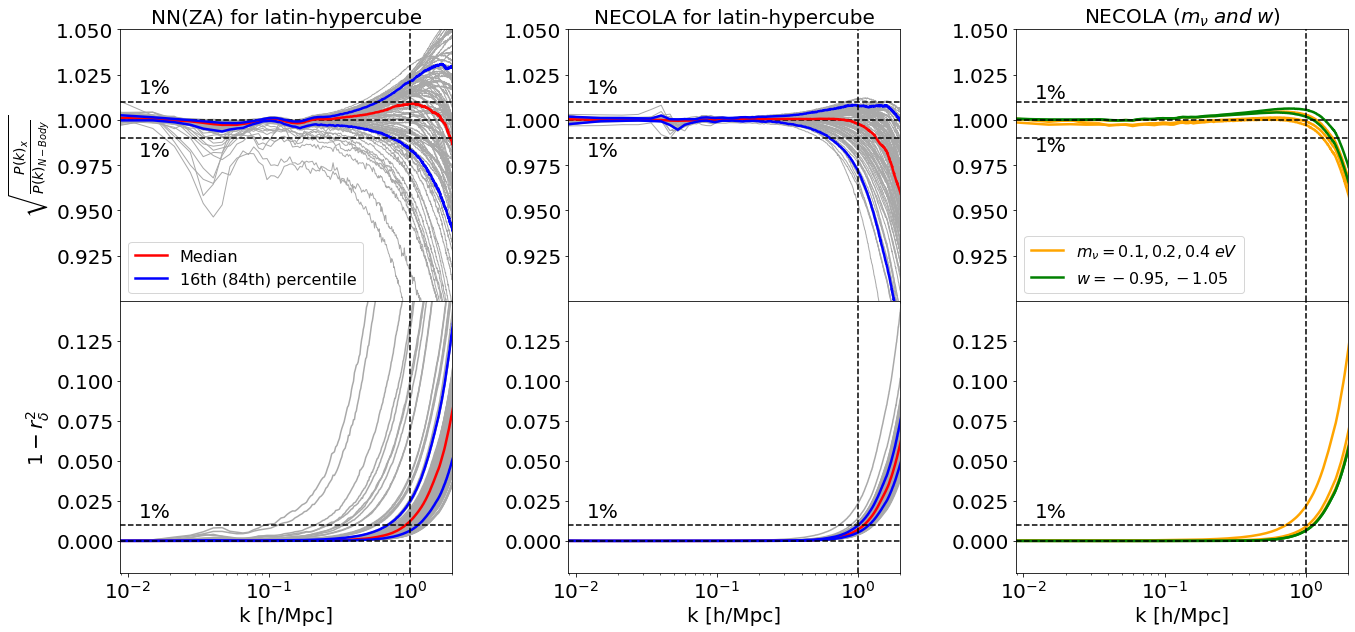

In [14]:
mylw = 2.5
xlimdist = 2.0
ticklabelsize = 24-4
axeslabelsize = 24-4
legendsize=20-4
titlesize=22-2

#---path to save graphs
path_to_save='/scratch/gpfs/QUIJOTE/arena_cola2nbody/results/3_extensions_analysis/much_newer_graphs/'
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)
    

f, ax = plt.subplots(2, 3, figsize=(22,10), gridspec_kw={'height_ratios': [1, 1]}, sharex='col')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.0001)
ax2,ax1,ax4,ax3,ax5,ax6 = ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[0,2], ax[1,2]



#----SUBPLOT 1
for i in range(K.shape[0]):
    ax1.plot(K[i,:], TK_neerav[i,:], color="darkgray",lw=1)
ax1.axhline(1.0, c='k', ls='--')
ax1.plot(K[0], np.percentile(TK_neerav,50,axis=0), color="red", lw=mylw)#, label='50th percentile')
ax1.plot(K[0], np.percentile(TK_neerav,16,axis=0), color="blue", lw=mylw)#, label='16th (84th) percentile')
ax1.plot(K[0], np.percentile(TK_neerav,84,axis=0), color="blue", lw=mylw)
ax1.axvline(1.0, c='k', ls='--', lw=1.5)

ax1.axhline(1+0.01, c='k', ls='--', lw=1.5)
ax1.axhline(1-0.01, c='k', ls='--', lw=1.5)
ax1.text(0.012, 1.015, r'1%', fontsize=20)
ax1.text(0.012, 1-0.02, r'1%', fontsize=20)

ax1.set_title('NECOLA for latin-hypercube', fontsize=titlesize) 
#ax1.set_xlabel("k (h/Mpc)", fontsize=axeslabelsize)
#ax1.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{N-Body}}}$", fontsize=axeslabelsize)
ax1.set_xscale('log')
ax1.set_xlim(K[i,:][0],xlimdist)
ax1.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax1.set_yticks([0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax1.set_ylim(0.9,1.05)
#ax1.legend(fontsize=legendsize)

ax5.plot(K[0], np.mean(TK_nu4,axis=0), color="orange", lw=mylw, label=r'$m_{\nu}=0.1,0.2,0.4\;eV$')
ax5.plot(K[0], np.mean(TK_nu2,axis=0), color="orange", lw=mylw)#, label='16th (84th) percentile')
ax5.plot(K[0], np.mean(TK_nu1,axis=0), color="orange", lw=mylw)
ax5.plot(K[0], np.mean(TK_wp ,axis=0), color="green"  , lw=mylw, label=r'$w=-0.95,-1.05$')#, label='16th (84th) percentile')
ax5.plot(K[0], np.mean(TK_wm ,axis=0), color="green"  , lw=mylw)#, label='16th (84th) percentile')
ax5.axvline(1.0, c='k', ls='--', lw=1.5)
ax5.axhline(1.0, c='k', ls='--', lw=1.5)

ax5.axhline(1+0.01, c='k', ls='--', lw=1.5)
ax5.axhline(1-0.01, c='k', ls='--', lw=1.5)
ax5.text(0.012, 1.012, r'1%', fontsize=20)
ax5.text(0.012, 1-0.017, r'1%', fontsize=20)

ax5.set_title(r'NECOLA ($m_{\nu} \;and\; w$)', fontsize=titlesize) 
#ax5.set_xlabel("k (h/Mpc)", fontsize=axeslabelsize)
#ax5.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{N-Body}}}$", fontsize=axeslabelsize)
ax5.set_xscale('log')
ax5.set_xlim(K[i,:][0],xlimdist)
ax5.tick_params(axis='both', which='major', labelsize=ticklabelsize)
#ax5.set_yticks([0.925,0.950,0.975,1.0,1.025,1.050,1.075])
#ax5.set_yticks(np.arange(0.925,1.05,0.01))
ax5.set_yticks([0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax5.set_ylim(0.9,1.05)
ax5.legend(fontsize=legendsize, loc=3)


#----SUBPLOT 2
for i in range(K.shape[0]):
    ax2.plot(K[i,:], TK_yin[i,:], color="darkgray",lw=1)
ax2.axhline(1.0, c='k', ls='--')
ax2.plot(K[0], np.percentile(TK_yin,50,axis=0), color="red", lw=mylw, label='Median')
ax2.plot(K[0], np.percentile(TK_yin,16,axis=0), color="blue", lw=mylw, label='16th (84th) percentile')
ax2.plot(K[0], np.percentile(TK_yin,84,axis=0), color="blue", lw=mylw)
ax2.axvline(1.0, c='k', ls='--',lw=1.5)
ax2.axhline(1+0.01, c='k', ls='--', lw=1.5)
ax2.axhline(1-0.01, c='k', ls='--', lw=1.5)
ax2.text(0.012, 1.015, r'1%', fontsize=20)
ax2.text(0.012, 1-0.02, r'1%', fontsize=20)
ax2.set_title('NN(ZA) for latin-hypercube', fontsize=titlesize) 
#ax2.set_xlabel("k (h/Mpc)", fontsize=axeslabelsize)
ax2.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{N-Body}}}$", fontsize=axeslabelsize)
ax2.set_xscale('log')
ax2.set_xlim(K[i,:][0],xlimdist)
ax2.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax2.set_yticks([0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax2.set_ylim(0.9,1.05)
ax2.legend(fontsize=legendsize,loc=3)


#----SUBPLOT 3
for i in range(K.shape[0]):
    ax3.plot(K[i,:], cf_neerav[i,:], color="darkgray")
ax3.plot(K[0], np.percentile(cf_neerav,50,axis=0), color="red", lw=mylw)#, label='50th percentile')
#a31.plot(K[0], mean_cf_c2q, color="red", lw=mylw)
ax3.plot(K[0], np.percentile(cf_neerav,16,axis=0), color="blue", lw=mylw)#, label='16th (84th) percentile')
ax3.plot(K[0], np.percentile(cf_neerav,84,axis=0), color="blue", lw=mylw)
ax3.axvline(1.0, c='k', ls='--')
ax3.axhline(0.0, c='k', ls='--')

ax3.axhline(0+0.01, c='k', ls='--', lw=1.5)
ax3.text(0.012, 0.015, r'1%', fontsize=20)

#ax3.set_title('NN(LPT)', fontsize=titlesize) 
ax3.set_xlabel("k [h/Mpc]", fontsize=axeslabelsize)
#ax3.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax3.set_xscale('log')
ax3.set_xlim(K[i,:][0],xlimdist)
ax3.set_ylim(-0.02,0.15)
ax3.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax3.set_yticks(np.arange(0.0,0.126,0.025))#[0.925,0.950,0.975,1.0,1.025,1.050,1.075])
#ax3.legend(fontsize=legendsize)
ax6.plot(K[0], np.mean(cf_nu4,axis=0), color="orange", lw=mylw, label=r'$m_{\nu}=0.1,0.2,0.4\;eV$')#, label='50th percentile')
ax6.plot(K[0], np.mean(cf_nu2,axis=0), color="orange", lw=mylw)#, label='16th (84th) percentile')
ax6.plot(K[0], np.mean(cf_nu1,axis=0), color="orange", lw=mylw)
ax6.plot(K[0], np.mean(cf_wp ,axis=0), color="green"  , lw=mylw, label=r'$w=-0.95,-1.05$')#, label='16th (84th) percentile')
ax6.plot(K[0], np.mean(cf_wm ,axis=0), color="green"  , lw=mylw)#, label='16th (84th) percentile')
ax6.axvline(1.0, c='k', ls='--')
ax6.axhline(0.0, c='k', ls='--')

ax6.axhline(0+0.01, c='k', ls='--', lw=1.5)
ax6.text(0.012, 0.015, r'1%', fontsize=20)
#ax6.text(1.1, 0.1, r'$0.4\;eV$', fontsize=16)

#ax6.set_title('NN(LPT)', fontsize=titlesize) 
ax6.set_xlabel("k [h/Mpc]", fontsize=axeslabelsize)
#ax6.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax6.set_xscale('log')
ax6.set_xlim(K[i,:][0],xlimdist)
ax6.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax6.set_yticks(np.arange(0.0,0.126,0.025))#[0.925,0.950,0.975,1.0,1.025,1.050,1.075])
ax6.set_ylim(-0.02,0.15)
#ax6.legend(fontsize=legendsize)

#----SUBPLOT 4
for i in range(K.shape[0]):
    ax4.plot(K[i,:], cf_yin[i,:], color="darkgray")
ax4.plot(K[0], np.percentile(cf_yin,50,axis=0), color="red" , lw=mylw)#, label='50th percentile')
ax4.plot(K[0], np.percentile(cf_yin,16,axis=0), color="blue", lw=mylw)#, label='16th (84th) percentile')
ax4.plot(K[0], np.percentile(cf_yin,84,axis=0), color="blue", lw=mylw)
ax4.axvline(1.0, c='k', ls='--')
ax4.axhline(0.0, c='k', ls='--')

ax4.axhline(0+0.01, c='k', ls='--', lw=1.5)
ax4.text(0.012, 0.015, r'1%', fontsize=20)

#ax4.set_title('NN(LPT)', fontsize=titlesize) 
ax4.set_xlabel("k [h/Mpc]", fontsize=axeslabelsize)
ax4.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax4.set_xscale('log')
ax4.set_xlim(K[i,:][0],xlimdist)
ax4.set_ylim(-0.02,0.15)
ax4.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax4.set_yticks(np.arange(0.0,0.126,0.025)) #[0.925,0.950,0.975,1.0,1.025,1.050,1.075])
#ax4.legend(fontsize=legendsize)

f.savefig(os.path.join(path_to_save,'results_extensions.png'))

plt.show()

In [10]:
a = np.arange(1,101,1)
np.percentile(a,5), np.percentile()

5.95

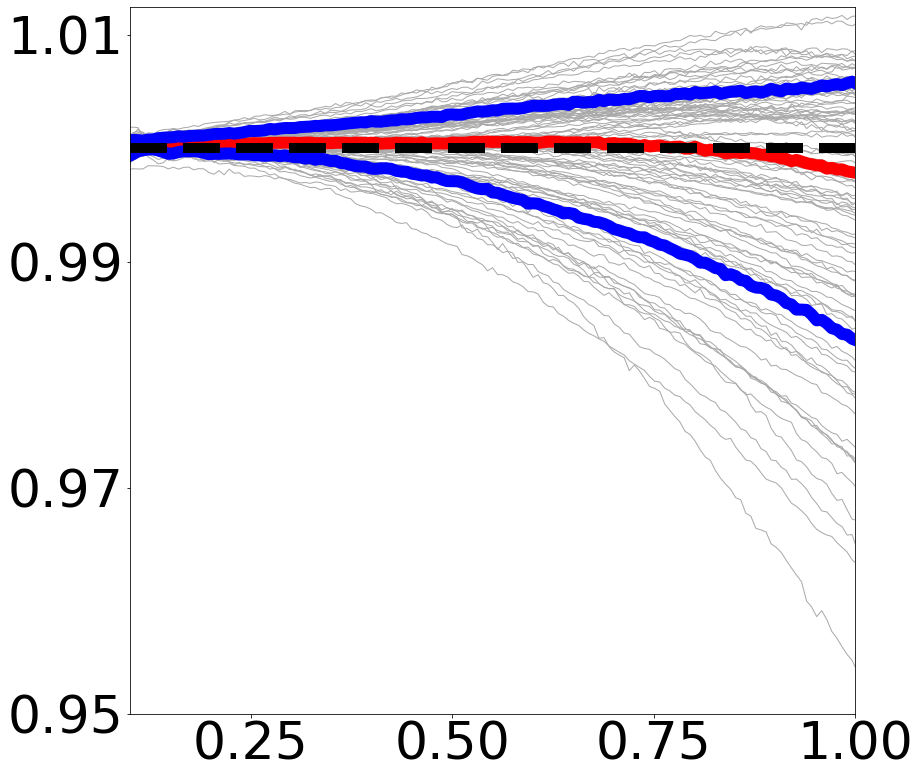

In [26]:
mylw = 12
xlimdist = 2.0
ticklabelsize = 52
axeslabelsize = 38
legendsize=20-4
titlesize=22-2

fig,ax1 = plt.subplots(figsize=(13,13))
for i in range(K.shape[0]):
    ax1.plot(K[i,:], TK_neerav[i,:], color="darkgray",lw=1)

ax1.plot(K[0], np.percentile(TK_neerav,50,axis=0), color="red", lw=mylw)#, label='50th percentile')
ax1.plot(K[0], np.percentile(TK_neerav,16,axis=0), color="blue", lw=mylw)#, label='16th (84th) percentile')
ax1.plot(K[0], np.percentile(TK_neerav,84,axis=0), color="blue", lw=mylw)
ax1.axhline(1.0, c='k', ls='--', lw=mylw-2)
#ax1.axvline(1.0, c='k', ls='--', lw=1.5)
#ax1.set_title('NECOLA for latin-hypercube', fontsize=titlesize) 
#ax1.set_xlabel("k (h/Mpc)", fontsize=axeslabelsize)
#ax1.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{N-Body}}}$", fontsize=axeslabelsize)
#ax1.set_xscale('log')
ax1.set_xlim(K[i,:][0],xlimdist)
ax1.tick_params(axis='both', which='major', labelsize=ticklabelsize)

ax1.set_ylim(0.95,1.0125)
ax1.set_yticks(np.arange(0.95,1.025,0.02))

ax1.set_xlim(0.1,1)
#ax1.set_xticks([1e-1,0.25,0.5,0.75,1.0])
ax1.set_xticks([0.25,0.5,0.75,1.0])
#ax1.legend(fontsize=legendsize)
fig.savefig(os.path.join(path_to_save,'inset_01.png'))
#ax1.text(0.25, 0.98, "25 and 75", fontsize=26)
fig.show()

In [ ]:
mylw = 12
xlimdist = 2.0
ticklabelsize = 52
axeslabelsize = 38
legendsize=20-4
titlesize=22-2

fig,ax3 = plt.subplots(figsize=(16.5,16.5))

for i in range(K.shape[0]):
    ax3.plot(K[i,:], cf_neerav[i,:], color="darkgray")
ax3.plot(K[0], np.percentile(cf_neerav,50,axis=0), color="red", lw=mylw)#, label='50th percentile')
#a31.plot(K[0], mean_cf_c2q, color="red", lw=mylw)
ax3.plot(K[0], np.percentile(cf_neerav,16,axis=0), color="blue", lw=mylw)#, label='16th (84th) percentile')
ax3.plot(K[0], np.percentile(cf_neerav,84,axis=0), color="blue", lw=mylw)
#ax3.axvline(1.0, c='k', ls='--', lw=mylw-2)
ax3.axhline(0.0, c='k', ls='--', lw=mylw-2)
#ax3.set_xlabel("k [h/Mpc]", fontsize=axeslabelsize)
#ax3.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
#ax3.set_xscale('log')
#ax3.set_xlim(K[i,:][0],xlimdist)
#ax3.set_ylim(-0.02,0.15)
ax3.tick_params(axis='both', which='major', labelsize=ticklabelsize)


ax3.set_ylim(-0.005,0.0125)
#ax3.set_yticks(np.arange(-0.005,0.0125,0.005))

ax3.set_xlim(0.1,1)
#ax1.set_xticks([1e-1,0.25,0.5,0.75,1.0])
#ax3.set_xticks(np.arange(0.1,1.2,0.25))
#ax1.legend(fontsize=legendsize)
ax3.set_xticks([0.25,0.5,0.75,1.0])
ax3.set_yticks([-0.005,0.0,0.005,0.01])
fig.savefig(os.path.join(path_to_save,'inset_10.png'))